<a href="https://colab.research.google.com/github/Bhageerath123/Machine-Learning-Models-for-Detecting-Malicious-Traffic-in-IoT-Devices-using-IoT-23-Dataset/blob/main/Dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: preprocessed final_2.csv, id: 1LE5qqd3Jv9aArH83gIIQOzQqrRtkiEsH
title: preprocessed final_1.csv, id: 1LdY_SCqKLJI3O9qY36tNzktBiLY7ZiQd
title: Dtaset 4Labels, id: 1UsYulnKaEz96fbTA9pAhErwybAHpsm7q
title: FINAL DATASET 4.csv, id: 1fRs2RE2LKJ7nW0-4Z95T626wibAlebL3
title: Sample2.csv, id: 15nJR4HagHSkOvLS86Z-I6G2FVwSBsN-x
title: Sample2, id: 1sgUoRPSs1NZT2BwufU2zwca8kXKE8oz6F_0d8zj7fHw
title: preprocessed final.csv, id: 1xOROenk2PKd50HpEaxNcoHIVgT1YzXiv
title: Final Dataset 0 1_1, id: 1-AZmpDkwNCzEXgYBMAhmoaDFEkynhtbf
title: Final Dataset_1_1.csv, id: 1NskVqX2h4KcdhjSRJNeCG5fbpMHOrTCV
title: Final Dataset 0 1_2, id: 1w_V8insIM0L_Y1sfUlgz5tBRsLHC_vz3
title: Final Dataset 0 1, id: 1qOXERY14g_QYB8k-g6bQgqrBI8_bqqsZ
title: Final Dataset, id: 133-6o2oO_nQyjv8z1f0KGNvDU55r_-G1
title: dataset4.csv, id: 18ZHKl1-5V9Abz923O5Zk1KptEL0tRxgb
title: dataset1.csv, id: 18s59CqeQw0r5fjKbpAHCOcqWeKYhRzXB
title: kdd_train.csv, id: 1EpMHv7uUKmYYJRMUwwBaWs_2bXegDxla
title: Final, id: 1B9jeMN_Tyr_og62Jq-

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf



In [ ]:
downloadedTrain = drive.CreateFile({'id': '1LdY_SCqKLJI3O9qY36tNzktBiLY7ZiQd'})
downloadedTrain.GetContentFile('Preprocessed1.csv')

In [ ]:
downloadedTrain = drive.CreateFile({'id': '1LE5qqd3Jv9aArH83gIIQOzQqrRtkiEsH'})
downloadedTrain.GetContentFile('Preprocessed2.csv')

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
TextFileReader = pd.read_csv('Preprocessed1.csv', chunksize=1000000)  # the number of rows per chunk

dfList = []
for df in TextFileReader:
    dfList.append(df)

data3= pd.concat(dfList,sort=False)

In [ ]:
TextFileReader = pd.read_csv('Preprocessed2.csv', chunksize=100000)  # the number of rows per chunk

dfList = []
for df in TextFileReader:
    dfList.append(df)

data2= pd.concat(dfList,sort=False)

In [ ]:
data3.head()

,Unnamed: 0,ts,idorighost,idorigport,idresphost,idrespport,proto,service,duration,origbytes,respbytes,connstate,missedbytes,history,origpkts,origipbytes,resppkts,respipbytes,Label
0,0,1545473150,19371,44229,20124892,992,1,0,4.940443,0.000000e+00,0.000000,3,0,50,5,200,0,0,0
1,1,1545480817,19371,48566,22126265,23,1,0,4.368889,2.469552e+08,3083.732234,6,0,52,1,60,0,0,1
2,2,1545485127,19371,53600,16622132,23,1,0,3.156711,0.000000e+00,0.000000,6,0,52,3,180,0,0,1
3,3,1545420288,19371,38636,8393436,23,1,0,3.142477,0.000000e+00,0.000000,6,0,52,3,180,0,0,1
4,4,1545420905,19373,36097,4006968,37215,1,0,4.368889,2.469552e+08,3083.732234,6,0,52,1,40,0,0,0


In [ ]:
data3.dtypes

ts               int64
idorighost       int64
idorigport       int64
idresphost       int64
idrespport       int64
proto            int64
service          int64
duration       float64
origbytes      float64
respbytes      float64
connstate        int64
missedbytes      int64
history          int64
origpkts         int64
origipbytes      int64
resppkts         int64
respipbytes      int64
Label            int64
dtype: object

In [ ]:
#data3.to_csv('data3')

In [ ]:
#data3=pd.read_csv('Final.csv', sep='\t')
#names=["ts",	"uid",	"id.orig_h",	"id.orig_p",	"id.resp_h",	"id.resp_p",	"proto",		"service", 	"duration",	"orig_bytes",	"resp_bytes",	"conn_state",	"local_orig",	"local_resp",	"missed_bytes",	"history", "orig_pkts",	"orig_ip_bytes",	"resp_pkts",	"resp_ip_bytes", "label","detailed-label"])


In [ ]:
data3=data3.drop('Unnamed: 0', axis=1)

In [ ]:
data2=data2.drop('Unnamed: 0', axis=1)

In [ ]:
data3.nunique()

ts               974088
idorighost        45171
idorigport        65536
idresphost     24182693
idrespport        65435
proto                 3
service               7
duration         876911
origbytes         44513
respbytes          1165
connstate            14
missedbytes          44
history             386
origpkts            225
origipbytes        2227
resppkts            161
respipbytes        2258
Label                 2
dtype: int64

In [ ]:
np.any(np.isnan(data3))

False

In [ ]:
data3.isna().sum()

ts             0
idorighost     0
idorigport     0
idresphost     0
idrespport     0
proto          0
service        0
duration       0
origbytes      0
respbytes      0
connstate      0
missedbytes    0
history        0
origpkts       0
origipbytes    0
resppkts       0
respipbytes    0
Label          0
dtype: int64

In [ ]:
data3.isna().sum()

ts             0
idorighost     0
idorigport     0
idresphost     0
idrespport     0
proto          0
service        0
duration       0
origbytes      0
respbytes      0
connstate      0
missedbytes    0
history        0
origpkts       0
origipbytes    0
resppkts       0
respipbytes    0
Label          0
dtype: int64

The below commeneted code is for datapreprocessing of large dataset. To save time during data preprocessing when wokring on this large dataset, this dataset is preprocessed and split into train and test dataset. These train and test datasets are downloaded and used for building different models which saved so much time as this is large dataset.

In [ ]:
#data3=data3.drop(['localorig','localresp'], axis=1)

In [ ]:
#data3=data3.drop('uid', axis=1)

In [ ]:
#from sklearn.preprocessing import LabelEncoder

In [ ]:
#encoder = LabelEncoder()
#data3['proto'] = data3['proto'].str.replace('-', ' ')
#data3['proto'] = data3['proto'].astype(str)
#data3['proto'] = encoder.fit_transform(data3['proto'])
#data3['service'] = data3['service'].str.replace('-', ' ')
#data3['service'] = data3['service'].astype(str)
#data3['service'] = encoder.fit_transform(data3['service'])

In [ ]:
#encoder = LabelEncoder()
#data3['connstate'] = data3['connstate'].str.replace('-', ' ')
#data3['connstate'] = data3['connstate'].astype(str)
#data3['connstate'] = encoder.fit_transform(data3['connstate'])

In [ ]:
#encoder = LabelEncoder()
#data3['history'] = data3['history'].str.replace('-', ' ')
#data3['history'] = data3['history'].astype(str)
#data3['history'] = encoder.fit_transform(data3['history'])

In [ ]:
#data3['duration'] = data3['duration'].str.replace('S0', ' ')

In [ ]:
#data3['duration'] = data3['duration'].str.replace('-', ' ')

In [ ]:
#data3['duration'] = pd.to_numeric(data3['duration'], errors='coerce')

In [ ]:
#data3['duration'] = data3['duration'].astype(str).astype(float)

In [ ]:
#data3['origbytes'] = data3['origbytes'].str.replace('-', ' ')

In [ ]:
#data3['origbytes'] = pd.to_numeric(data3['origbytes'], errors='coerce')

In [ ]:
#data3['respbytes'] = data3['respbytes'].str.replace('-', ' ')

In [ ]:
#data3['respbytes'] = pd.to_numeric(data3['respbytes'], errors='coerce')

In [ ]:
#data3['idorighost'] = data3['idorighost'].str.replace('-', ' ')

In [ ]:
#data3['idresphost'] = data3['idresphost'].str.replace('-', ' ')

In [ ]:
#encoder = LabelEncoder()
#data3['idorighost'] = data3['idorighost'].astype(str)
#data3['idorighost'] = encoder.fit_transform(data3['idorighost'])

In [ ]:
#encoder = LabelEncoder()
#data3['idresphost'] = data3['idresphost'].astype(str)
#data3['idresphost'] = encoder.fit_transform(data3['idresphost'])

In [ ]:
#data3[['duration','origbytes','respbytes']] = data3[['duration','origbytes','respbytes']].fillna(value=data3[['duration','origbytes','respbytes']].mean())

In [ ]:
#y=data3['Label']

In [ ]:
#x=data3.drop(['Label'],axis=1)

In [ ]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,
 #                                              random_state=2)

In [ ]:
#train_dataset=[x_train,y_train]

In [ ]:
#train_dataset=pd.concat(adddata)

In [ ]:
#test_data=[x_test,y_test]

In [ ]:
#test_dataset=pd.concat(adddata)

In [ ]:
#from google.colab import files
#train_dataset.to_csv('preprocessed final_1.csv') 
#files.download('preprocessed final_1.csv')
#from google.colab import files
#test_dataset.to_csv('preprocessed final_2.csv') 
#files.download('preprocessed final_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x_train=data3.drop('Label',axis=1)

In [ ]:
y_train=data3['Label']

In [ ]:
y_train = pd.get_dummies(y_train)

In [ ]:
x_test=data2.drop('Label',axis=1)

In [ ]:
y_test=data2['Label']

In [ ]:
y_test = pd.get_dummies(y_test)

In [ ]:
y_train

,0,1
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
19999994,0,1
19999995,1,0
19999996,1,0
19999997,0,1


In [ ]:
import tensorflow as tf

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score
import sys
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
st=StandardScaler()
st.fit(x_train)
x_train=pd.DataFrame(st.transform(x_train))
x_test=pd.DataFrame(st.transform(x_test))

In [ ]:
  x_train.shape
x_test.shape

(15362337, 17)

Logistc Regression Model

In [ ]:
weights = tf.Variable(tf.random.normal(shape=(17, 2), dtype=tf.float64))
biases  = tf.Variable(tf.random.normal(shape=(2,), dtype=tf.float64))

In [ ]:
def logistic_regression(x):
    lr = tf.add(tf.matmul(x, weights), biases)
    return lr


def cross_entropy(y_true, y_pred):
    loss = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred)
    return tf.reduce_mean(loss)

def accuracy(y_true, y_pred):
    y_true = tf.cast(tf.argmax(y_true, axis=1), dtype=tf.int32)
    preds = tf.cast(tf.argmax(y_pred, axis=1), dtype=tf.int32)
    preds = tf.equal(y_true, preds)
    return tf.reduce_mean(tf.cast(preds, dtype=tf.float32))

def roc_auc(y_true,x):
    y_true = tf.cast(tf.argmax(y_true, axis=1), dtype=tf.int32).numpy()
    y_pred=tf.nn.softmax(logistic_regression(x))[:,1]
    return(roc_auc_score(y_true,y_pred))

def grad(x, y):
    with tf.GradientTape() as tape:
        y_pred = logistic_regression(x)
        loss_val = cross_entropy(y, y_pred)
    return tape.gradient(loss_val, [weights, biases])

In [ ]:
epochs=2000

In [ ]:
learning_rate=0.1
for epoch in range(epochs):
    rand_ind=np.random.choice(range(x_train.shape[0]),100)
    outputs=y_train.iloc[rand_ind,:].values
    inputs=x_train.iloc[rand_ind,:].values
    
    dw,db=grad(inputs,tf.cast(outputs,'float32'))
    
    weights.assign_sub(learning_rate*dw)
    biases.assign_sub(learning_rate*db)
    
    if epoch%200==0:
        print(accuracy(y_test.values,logistic_regression(x_test.values)).numpy(),roc_auc(y_test.values,x_test.values))
    

# **Logistic Regression using Tensor flow with hidden Layer**

In [ ]:
weights_h = tf.Variable(tf.random.truncated_normal(shape=(17, 4), dtype=tf.float64))
biases_h  = tf.Variable(tf.random.truncated_normal(shape=(4,), dtype=tf.float64))

weights_o = tf.Variable(tf.random.truncated_normal(shape=(4, 2), dtype=tf.float64))
biases_o  = tf.Variable(tf.random.truncated_normal(shape=(2,), dtype=tf.float64))

In [ ]:
def logistic_regression(x):
    h_o = tf.add(tf.matmul(x, weights_h), biases_h)
    h_o=tf.nn.relu(h_o)
    lr=tf.add(tf.matmul(h_o, weights_o), biases_o)
    return lr


def cross_entropy(y_true, y_pred):

    loss = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred)
    return tf.reduce_mean(loss)


def accuracy(y_true, y_pred):
    y_true = tf.cast(tf.argmax(y_true, axis=1), dtype=tf.int32)
    preds = tf.cast(tf.argmax(y_pred, axis=1), dtype=tf.int32)
    preds = tf.equal(y_true, preds)
    return tf.reduce_mean(tf.cast(preds, dtype=tf.float32))

def roc_auc(y_true,x):
    y_true = tf.cast(tf.argmax(y_true, axis=1), dtype=tf.int32).numpy()
    y_pred=tf.nn.softmax(logistic_regression(x))[:,1]
    return(roc_auc_score(y_true,y_pred))

def grad(x, y):
    with tf.GradientTape() as tape:
        y_pred = logistic_regression(x)
        loss_val = cross_entropy(y, y_pred)
    return tape.gradient(loss_val, [weights_h, biases_h,weights_o, biases_o])

In [ ]:
epochs=2000

In [ ]:
learning_rate=0.1
for epoch in range(epochs):
    rand_ind=np.random.choice(range(x_train.shape[0]),100)
    outputs=y_train.iloc[rand_ind,:].values
    inputs=x_train.iloc[rand_ind,:].values
    dw_h,db_h,dw_o,db_o=grad(inputs,tf.cast(outputs,'float32'))
    
    weights_h.assign_sub(learning_rate*dw_h)
    biases_h.assign_sub(learning_rate*db_h)
    weights_o.assign_sub(learning_rate*dw_o)
    biases_o.assign_sub(learning_rate*db_o)
    
    if epoch%200==0:
        print(accuracy(y_test.values,logistic_regression(x_test.values)).numpy(),roc_auc(y_test.values,x_test.values))
    
    

0.44925106 0.5931105139858074
0.89462155 0.9039352590809463
0.9324647 0.9587995008369532
0.93691254 0.9610998566449692
0.9590709 0.9676036937315777
0.96123254 0.9702963011904527
0.9612948 0.9721509357132968
0.9616118 0.9736015889834198


KeyboardInterrupt: ignored

In [ ]:
 print(accuracy(y_test.values,logistic_regression(x_test.values)).numpy())

0.9613758


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [ ]:
y_pred=logistic_regression(x_test)

In [ ]:
y_test2=y_test.values

In [ ]:
x_test2=x_test.values

In [ ]:
y_test_class = np.argmax(y_test2,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [ ]:
print('Precision: {:.5f}'.format(precision_score(y_test_class,y_pred_class,average="macro")))
print('Recall: {:.5f}'.format(recall_score(y_test_class,y_pred_class,average="macro")))
print('F1-score: {:.5f}\n'.format(f1_score(y_test_class,y_pred_class,average="macro")))

Precision: 0.96390
Recall: 0.96073
F1-score: 0.96127



In [ ]:
from sklearn import metrics

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

Text(0.5, 257.44, 'Predicted label')

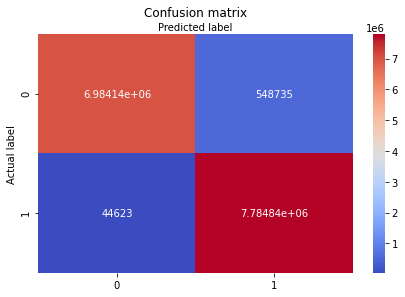

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test_class,y_pred_class)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
n_classes=y_test.shape[1]

In [ ]:
n_classes

2

In [ ]:
y_test

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
15362332,1,0
15362333,0,1
15362334,1,0
15362335,0,1


Precision: 0.934154
F1 score: 0.963289
Recall: 0.994301


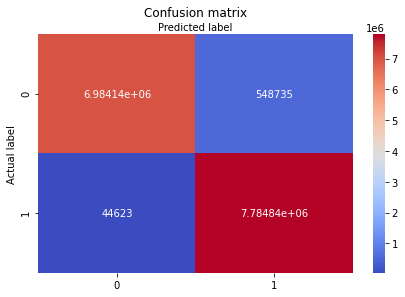

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test_class, y_pred_class)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

TP = cnf_matrix[1, 1]
TN = cnf_matrix[0, 0]
FP = cnf_matrix[0, 1]
FN = cnf_matrix[1, 0]
Recall = TP / float(FN + TP)
precision=TP/(TP+FP)
specificity = TN / (TN + FP)
f1= 2*TP/float(2*TP + FP + FN)
print('Precision: %f' % precision)
print('F1 score: %f' % f1)
print('Recall: %f' % Recall)

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_class, y_pred_class)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9607276299989387

Text(0.5, 0, 'False Positive Rate')

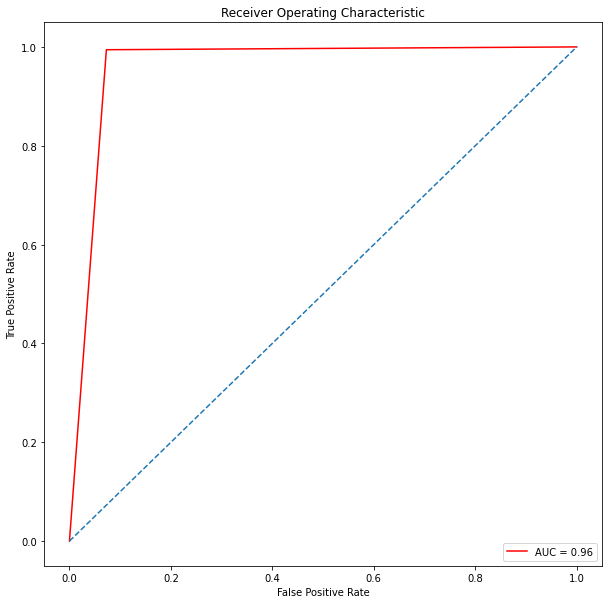

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_class,
                                  y_pred_class)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_class.ravel(), y_pred_class.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

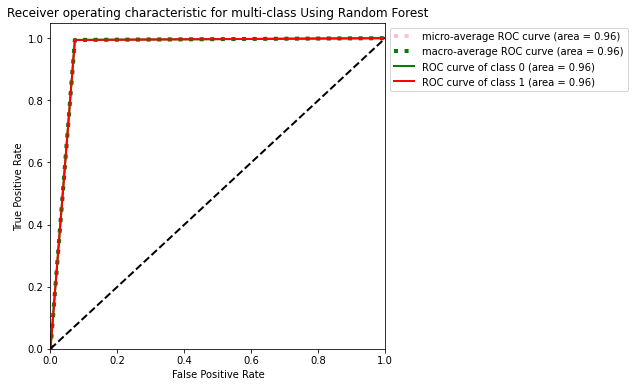

In [ ]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves

plt.figure(figsize=(6,6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='pink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['green', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class Using Random Forest')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.show()

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test_class, y_pred_class)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))


Average precision-recall score: 0.93


In [ ]:
from sklearn.metrics import (precision_recall_curve,
    PrecisionRecallDisplay)

In [ ]:
n_classes=2

In [ ]:
y_test_class

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
y_pred_class

array([1, 1, 1, ..., 0, 1, 0])

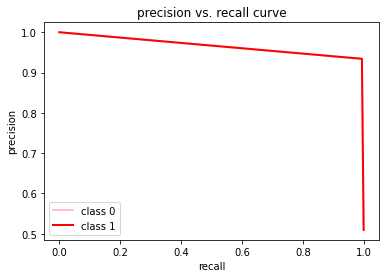

In [ ]:

precision = dict()
recall = dict()
colors = cycle(['pink', 'red'])
for i,color in zip(range(n_classes),colors):
    precision[i], recall[i], _ = precision_recall_curve(y_test_class,
                                                        y_pred_class)
    plt.plot(recall[i], precision[i], color=color, lw=2, label='class {}'.format(i))

   
    

   
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

# **ANN Classifier**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
X_train=data3.drop('Label',axis=1)

In [ ]:
y_train=data3['Label']

In [ ]:
X_test=data2.drop('Label',axis=1)

In [ ]:
y_test=data2['Label']

Run below 2 cells of code for ANN only. For below other models above 4 lines of code works

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1= encoder.fit_transform(y_train)
y_train = pd.get_dummies(y1).values

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1= encoder.fit_transform(y_test)
y_test = pd.get_dummies(y1).values

In [ ]:
y_train

array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [ ]:
model = Sequential()

model.add(Dense(17,input_shape=(17,), activation='relu'))

#Hidden Layer
model.add(Dense(8,input_shape=(8,), activation='relu'))


model.add(Dense(2, activation='softmax'))


In [ ]:
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st=StandardScaler()

In [ ]:
st.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train=pd.DataFrame(st.transform(X_train))
X_test=pd.DataFrame(st.transform(X_test))

In [ ]:
model.fit(X_train, y_train, batch_size=1000, epochs=5)


Epoch 1/5
20000/20000 [==============================] - 30s 1ms/step - loss: 0.1408 - accuracy: 0.9524
Epoch 2/5
20000/20000 [==============================] - 29s 1ms/step - loss: 0.0481 - accuracy: 0.9843
Epoch 3/5
20000/20000 [==============================] - 28s 1ms/step - loss: 0.0177 - accuracy: 0.9958
Epoch 4/5
20000/20000 [==============================] - 26s 1ms/step - loss: 0.0104 - accuracy: 0.9967
Epoch 5/5
20000/20000 [==============================] - 26s 1ms/step - loss: 0.0088 - accuracy: 0.9974


In [ ]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test_class,y_pred_class)

0.9980646824763706

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   7532874
           1       1.00      1.00      1.00   7829463

    accuracy                           1.00  15362337
   macro avg       1.00      1.00      1.00  15362337
weighted avg       1.00      1.00      1.00  15362337

[[7517575   15299]
 [  14432 7815031]]


In [ ]:
print('Precision: {:.5f}'.format(precision_score(y_test_class,y_pred_class,average="macro")))
print('Recall: {:.5f}'.format(recall_score(y_test_class,y_pred_class,average="macro")))
print('F1-score: {:.5f}\n'.format(f1_score(y_test_class,y_pred_class,average="macro")))

Precision: 0.99807
Recall: 0.99806
F1-score: 0.99806



In [ ]:
import sklearn.metrics
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

Text(0.5, 257.44, 'Predicted label')

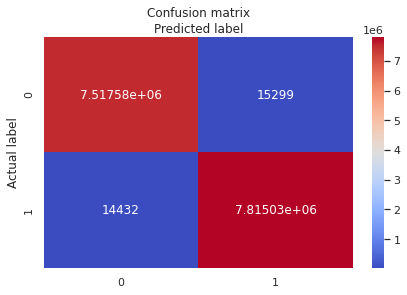

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test_class, y_pred_class)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
n_classes=2

In [ ]:
import sklearn.metrics
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_class, y_pred_class)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_class.ravel(), y_pred_class.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


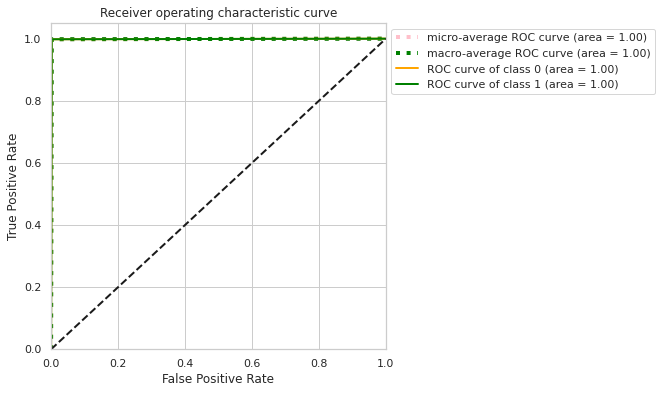

In [ ]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves

plt.figure(figsize=(6,6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='pink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['orange','green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

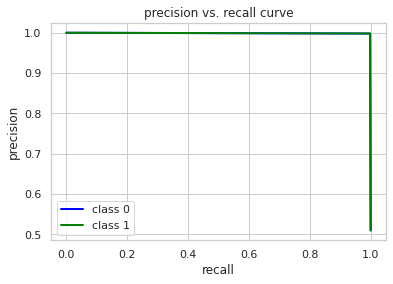

In [ ]:

precision = dict()
recall = dict()
colors = cycle(['blue','green'])
for i,color in zip(range(n_classes),colors):
    precision[i], recall[i], _ = precision_recall_curve(y_test_class,
                                                        y_pred_class)
    plt.plot(recall[i], precision[i], color=color, lw=2, label='class {}'.format(i))

   

   
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
%%time
from sklearn.metrics import accuracy_score


CPU times: user 23 µs, sys: 0 ns, total: 23 µs
Wall time: 40.8 µs


In [ ]:
%%time
dtree.fit(X_train,y_train)


CPU times: user 2min 43s, sys: 10.5 ms, total: 2min 43s
Wall time: 2min 43s


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_predsDT = dtree.predict(X_test)

accuracy_score(y_test, y_predsDT)


0.9999957688729261

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_predsDT))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   7532874
           1       1.00      1.00      1.00   7829463

    accuracy                           1.00  15362337
   macro avg       1.00      1.00      1.00  15362337
weighted avg       1.00      1.00      1.00  15362337



In [ ]:
confusion_matrix(y_test, y_predsDT)

array([[7532844,      30],
       [     35, 7829428]])

In [ ]:
print('Precision: {:.5f}'.format(precision_score(y_test, y_predsDT,average='macro')))
print('Recall: {:.5f}'.format(recall_score(y_test, y_predsDT,average='macro')))
print('F1-score: {:.5f}\n'.format(f1_score(y_test, y_predsDT,average='macro')))

Precision: 1.00000
Recall: 1.00000
F1-score: 1.00000



In [ ]:
from sklearn import metrics

In [ ]:
import sklearn.metrics
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

Text(0.5, 257.44, 'Predicted label')

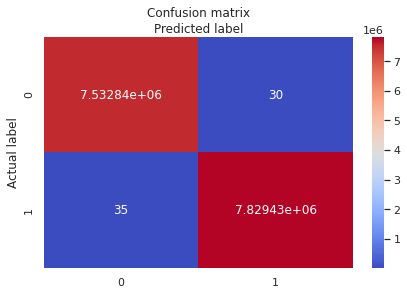

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_predsDT)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
import sklearn.metrics
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_predsDT)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_predsDT.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


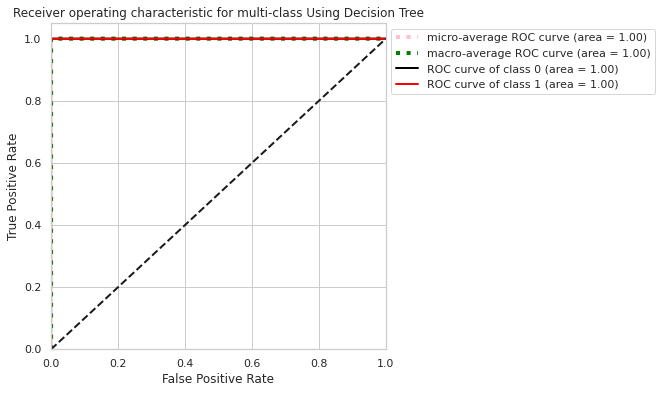

In [ ]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves

plt.figure(figsize=(6,6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='pink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['black','red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class Using Decision Tree')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.show()

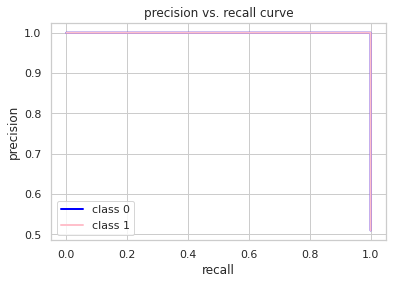

In [ ]:

precision = dict()
recall = dict()
colors = cycle(['blue','pink'])
for i,color in zip(range(n_classes),colors):
    precision[i], recall[i], _ = precision_recall_curve(y_test,
                                                        y_predsDT)
    plt.plot(recall[i], precision[i], color=color, lw=2, label='class {}'.format(i))

   

   
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
%%time
rf = RandomForestClassifier()

CPU times: user 50 µs, sys: 0 ns, total: 50 µs
Wall time: 64.4 µs


In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
%%time
rf.fit(X_train,y_train)
y_predsRF = rf.predict(X_test)


CPU times: user 1h 2min 37s, sys: 1.13 s, total: 1h 2min 38s
Wall time: 1h 2min 37s


In [ ]:
accuracy_score(y_test, y_predsRF)

0.9999953132130873

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score 

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_predsRF))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   7532874
           1       1.00      1.00      1.00   7829463

    accuracy                           1.00  15362337
   macro avg       1.00      1.00      1.00  15362337
weighted avg       1.00      1.00      1.00  15362337



In [ ]:
confusion_matrix(y_test, y_predsRF)

array([[7532869,       5],
       [     67, 7829396]])

In [ ]:
import sklearn.metrics
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

Text(0.5, 257.44, 'Predicted label')

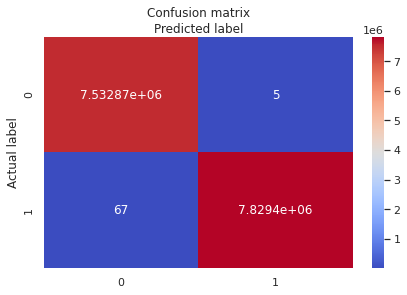

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_predsRF)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print('Precision: {:.5f}'.format(precision_score(y_test, y_predsRF, average='macro')))
print('Recall: {:.5f}'.format(recall_score(y_test, y_predsRF, average='macro')))
print('F1-score: {:.5f}\n'.format(f1_score(y_test, y_predsRF, average='macro')))

Precision: 1.00000
Recall: 1.00000
F1-score: 1.00000



In [ ]:
n_classes=2

In [ ]:
import sklearn.metrics
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_predsRF)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_predsRF.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


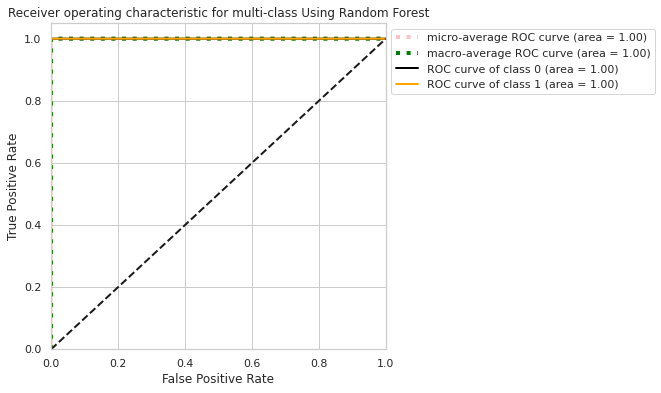

In [ ]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves

plt.figure(figsize=(6,6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='pink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['black','orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class Using Random Forest')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

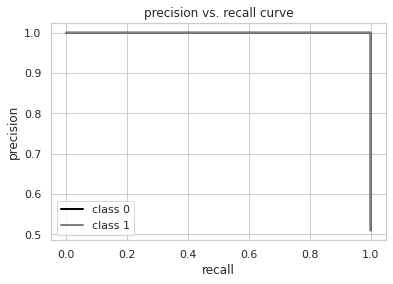

In [ ]:

precision = dict()
recall = dict()
colors = cycle(['black','grey'])
for i,color in zip(range(n_classes),colors):
    precision[i], recall[i], _ = precision_recall_curve(y_test,
                                                        y_predsRF)
    plt.plot(recall[i], precision[i], color=color, lw=2, label='class {}'.format(i))

   

   
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

# **XGB Classifier**

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=42,learning_rate=0.1)


In [ ]:
%%time
xgb.fit(X_train, y_train)


[01:56:16] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
CPU times: user 1h 41min 10s, sys: 12.2 s, total: 1h 41min 22s
Wall time: 1h 41min 21s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_predsXGB = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_predsXGB)

0.9990539850805252

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score 

In [ ]:
print('Precision: {:.5f}'.format(precision_score(y_test, y_predsXGB, average='macro')))
print('Recall: {:.5f}'.format(recall_score(y_test, y_predsXGB, average='macro')))
print('F1-score: {:.5f}\n'.format(f1_score(y_test, y_predsXGB, average='macro')))

Precision: 0.99904
Recall: 0.99907
F1-score: 0.99905



Text(0.5, 257.44, 'Predicted label')

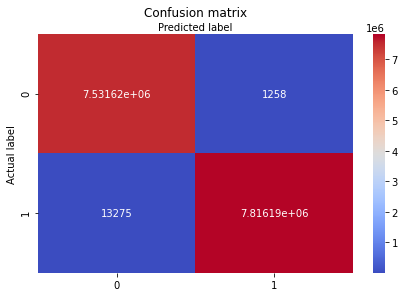

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_predsXGB)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_predsXGB))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   7532874
           1       1.00      1.00      1.00   7829463

    accuracy                           1.00  15362337
   macro avg       1.00      1.00      1.00  15362337
weighted avg       1.00      1.00      1.00  15362337



In [ ]:
confusion_matrix(y_test, y_predsXGB)

array([[7532865,       9],
       [     70, 7829393]])

In [ ]:
import sklearn.metrics
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_predsXGB)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_predsXGB.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

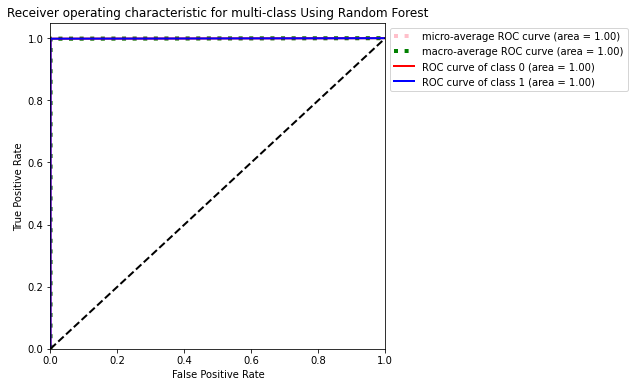

In [ ]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves

plt.figure(figsize=(6,6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='pink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['red','blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class Using Random Forest')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.show()

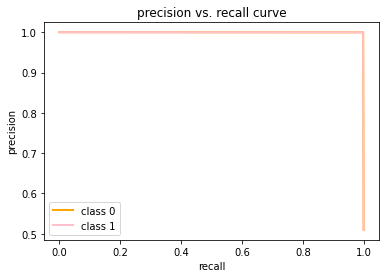

In [ ]:

precision = dict()
recall = dict()
colors = cycle(['orange','pink'])
for i,color in zip(range(n_classes),colors):
    precision[i], recall[i], _ = precision_recall_curve(y_test,
                                                        y_predsXGB)
    plt.plot(recall[i], precision[i], color=color, lw=2, label='class {}'.format(i))

   

   
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()